Columnas del dataset: Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')
Número de variables consideradas: 32
Best Accuracy: 0.9383886255924171


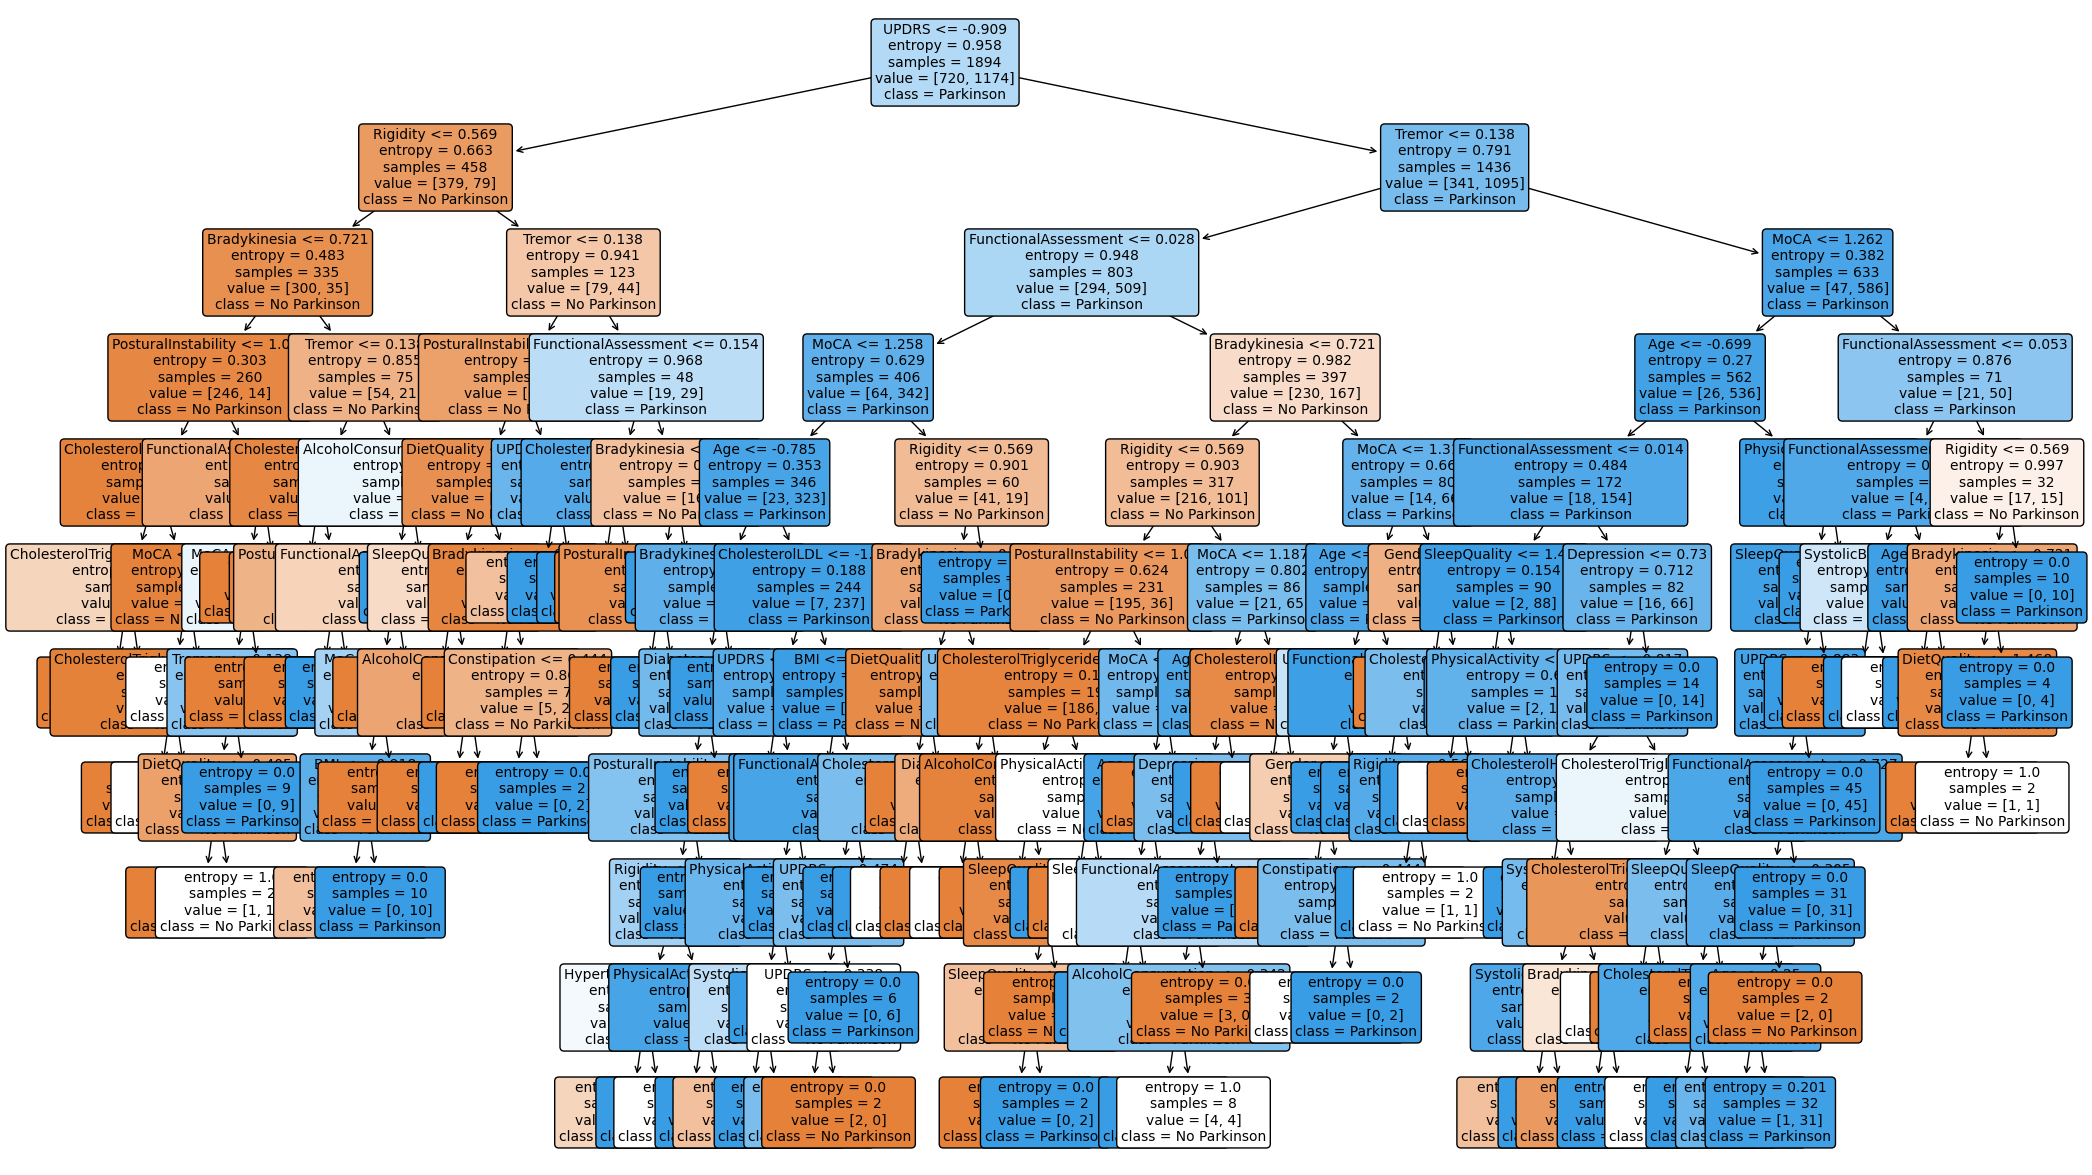

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os

# Cargar los datos
file_path = os.path.abspath('parkinsons_disease_data.csv')
data = pd.read_csv(file_path)

# Confirmar las columnas del dataset
print("Columnas del dataset:", data.columns)

# Confirmar el número de variables después de eliminar las irrelevantes
data = data.drop(columns=['PatientID', 'DoctorInCharge'])
print("Número de variables consideradas:", data.drop(columns=['Diagnosis']).shape[1])

# Separar características y etiqueta
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=32)

# Ajuste de Hiperparámetros para Árbol de Decisión
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=32), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Best Accuracy: {best_accuracy}')

# Visualización del mejor árbol de decisión
plt.figure(figsize=(25,15))
plot_tree(best_model, feature_names=X.columns, class_names=['No Parkinson', 'Parkinson'], filled=True, rounded=True, fontsize=10)
plt.show()
